# Домашнее задание 7

## Задача 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

#### Решение

In [26]:
import numpy as np
import pandas as pd
import sklearn

In [22]:
X = pd.DataFrame(np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]))
Y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])
X, Y

(          0         1         2         3
 0  1.224013  2.308685  3.036364  2.692872
 1 -0.187573  1.303374  5.120930  3.463632
 2 -0.810945  1.824634  5.796865  1.861594
 3  0.751290  2.673921  3.655298  1.667461
 4  0.009724  1.973673  2.505943  1.697552
 5 -0.629726  0.777508  2.841240  4.544106
 6  2.295362  1.812067  1.950262  1.518746
 7  0.092042  2.269714  7.477087  2.610812
 8  2.392528  3.175640  3.614206  5.107734
 9  0.549838  2.879887  1.657528  1.596360,
 array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
         7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]))

__Давайте сперва построим линейную регрессию по всем 4-ем, посмотрим на саммари, и от него уже будем отталкиваться и делать выводы:__

P.S. 
Не из-за лени, просто хочу потренироваться сам

In [36]:
import statsmodels.api as sm
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.344e+18
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    3.61e-55
Time:                        17:07:37   Log-Likelihood:                          174.62
No. Observations:                  10   AIC:                                     -341.2
Df Residuals:                       6   BIC:                                     -340.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Что-то не так. Почему $R^2$ = 1? И где константа? Ладно, попробую пока иначе

In [37]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression().fit(X, Y)
print(type(model2))
model2.intercept_, model2.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(-7.507278354523805e-09, array([1., 1., 1., 1.]))

Ну что это такое. Ладно давайте пары рассматривать, но я негодую

In [43]:
x1 = X[[0, 1]]
x1


,0,1
0,1.224013,2.308685
1,-0.187573,1.303374
2,-0.810945,1.824634
3,0.751290,2.673921
4,0.009724,1.973673
5,-0.629726,0.777508
6,2.295362,1.812067
7,0.092042,2.269714
8,2.392528,3.175640
9,0.549838,2.879887


In [41]:
model2 = LinearRegression().fit(x2, Y)
print(type(model2))
model2.intercept_, model2.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(6.70781579049774, array([0.40786841, 1.03360247]))

Аааа. Дело как раз в зависимости, да? Но почему тогда P = 1?

In [53]:
X[[1,2]]

,1,2
0,2.308685,3.036364
1,1.303374,5.120930
2,1.824634,5.796865
3,2.673921,3.655298
4,1.973673,2.505943
5,0.777508,2.841240
6,1.812067,1.950262
7,2.269714,7.477087
8,3.175640,3.614206
9,2.879887,1.657528


In [54]:
model1 = sm.OLS(Y, X[[0,1]])
model2 = sm.OLS(Y, X[[0,2]])
model3 = sm.OLS(Y, X[[0,3]])
model4 = sm.OLS(Y, X[[1,2]])
model5 = sm.OLS(Y, X[[1,3]])
model6 = sm.OLS(Y, X[[2,3]])


In [55]:
results = model1.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              38.83
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    7.61e-05
Time:                        17:21:31   Log-Likelihood:                         -24.766
No. Observations:                  10   AIC:                                      53.53
Df Residuals:                       8   BIC:                                      54.14
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [56]:
results = model2.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              114.8
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    1.29e-06
Time:                        17:21:53   Log-Likelihood:                         -19.665
No. Observations:                  10   AIC:                                      43.33
Df Residuals:                       8   BIC:                                      43.94
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [57]:
results = model3.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              36.62
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    9.41e-05
Time:                        17:21:57   Log-Likelihood:                         -25.031
No. Observations:                  10   AIC:                                      54.06
Df Residuals:                       8   BIC:                                      54.67
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [58]:
results = model4.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              114.4
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    1.30e-06
Time:                        17:22:02   Log-Likelihood:                         -19.680
No. Observations:                  10   AIC:                                      43.36
Df Residuals:                       8   BIC:                                      43.96
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [59]:
results = model5.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              138.4
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    6.23e-07
Time:                        17:22:06   Log-Likelihood:                         -18.759
No. Observations:                  10   AIC:                                      41.52
Df Residuals:                       8   BIC:                                      42.12
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [61]:
results = model6.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              94.30
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    2.74e-06
Time:                        17:22:18   Log-Likelihood:                         -20.612
No. Observations:                  10   AIC:                                      45.22
Df Residuals:                       8   BIC:                                      45.83
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


А как достать из модели статистику R-squared? Чтобы можно было программно найти максимум по всем?

#### Ну а так, похоже, лучшая модель 5-я (2-й и 4-й признак)

И да, она считается значимой, т к 0.006 - вероятность обратного

## Задача 2

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

1) Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

2) Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

3) Посчитайте коэффициент детерминации.

4) Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

5) (доп) Посчитать среднюю ошибку аппроксимации

#### Решение

In [134]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110] )
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

In [140]:
(salary*scoring).mean()

81141.7

In [141]:
b1 = ((salary*scoring).mean() - salary.mean()* scoring.mean()) / ((salary*salary).mean() - salary.mean()**2 )
b0 = scoring.mean() - b1* salary.mean()
b0, b1

(444.1773573243596, 2.620538882402765)

#### Ответ

$Y = 444.17 + 2.6\cdot X + E$

In [188]:
model = sm.OLS(scoring, salary)
result = model.fit()
print(result.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              76.10
Date:                Fri, 15 Oct 2021   Prob (F-statistic):                    1.10e-05
Time:                        11:57:11   Log-Likelihood:                         -68.901
No. Observations:                  10   AIC:                                      139.8
Df Residuals:                       9   BIC:                                      140.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Ну куда они дели свободный коэффициент? Что ж я тупой такой

Также я не понимаю, о чем он предупреждает. Что не так с кривизной? Почему на лекции все ок было, а тут n мало. Что за n вообще - кол-во наблюдений?

In [100]:
model2 = LinearRegression().fit(salary, scoring)
print(type(model2))
model2.intercept_, model2.coef_

ValueError: Expected 2D array, got 1D array instead:
array=[ 35  45 190 200  40  70  54 150 120 110].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Что не так? Я не понимаю, зачем ему 2D вектор? Нельзя построить линейную регрессию с одним параметром? Ну что это такое?

In [105]:
salary.T, scoring

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

И что тогда делает .T? Я думал, транспонирует, но судя по результату выше - нет

In [108]:
model2 = LinearRegression().fit(salary.reshape(-1, 1), scoring.reshape(-1, 1))
print(type(model2))
model2.intercept_, model2.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(array([444.17735732]), array([[2.62053888]]))

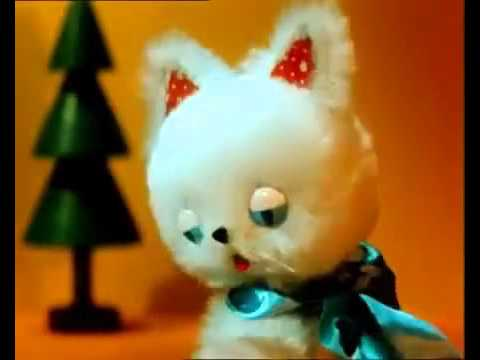

In [110]:
from IPython import display
display.Image("./hqdefault.jpeg")

#### Строим график

In [112]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

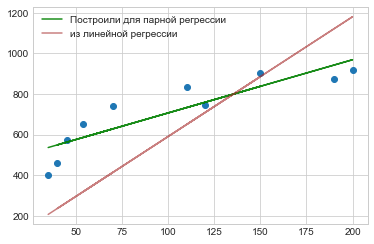

In [189]:
ox = salary
oy = b0 + b1 * ox

#oy1 = 444 + 2.6*ox
oy1 = 5.9*ox

plt.scatter(salary, scoring)

plt.plot(ox, oy, color='green', alpha=0.9, label = 'Построили для парной регрессии')
plt.plot(ox, oy1, color ='brown',alpha = 0.6, label = 'из линейной регрессии')
#plt.plot()
plt.legend()

plt.show()


Они же должны были получиться одинаковыми, верно? Но парная явно ближе

### Коэффициент детерминации

$$
R^2 = 1 - \frac{SS_{res}}{SS_y}
$$

Он вроде бы уже посчитан, в OLS. Посчитаем рукамим для парной регрессии

In [193]:
R2 = 1 - ((scoring - b0 - b1*salary)**2).sum()/(((scoring - scoring.mean() )**2).sum())
R2

0.7876386635293685

Но ничего-ничего. Сейчас мы выведем все на чистую воду. Говорят, квадрат коэффициента __Пирсона__ должен в точности совпасть с коэффициентом детерминации. Нам это на лекции рассказывали. Вот сейчас и проверим

In [171]:
import numpy

In [196]:
numpy.corrcoef(scoring, b1*salary + b0)[0,1] **2

0.7876386635293684

Сошлось. Значит, все не настолько плохо. Но что же за результат мы получили в OLS?

### Фишер

$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$

In [182]:
F = R2/1 /(1 - R2) / (len(salary) - 1 - 1)
F

0.46361938843225764

In [185]:
from scipy import stats

In [187]:
alpha = 0.05
k1 = 1
k2 = len(salary) - 1 - 1

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Фишер утверждает, что я придурок, и моя регрессия годится только для профессии дворника.

### Средняя ошибка апроксимации

In [201]:
A = abs( (scoring - b0 - b1*salary) / scoring ).mean()
A

0.11469251843561709